In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\yokeshkumar\Downloads\Logistic cost prediction project\data\LogisticCostData-26122022False.csv')

In [3]:
df_dist = pd.read_csv(r'C:\Users\yokeshkumar\Downloads\Logistic cost prediction project\data\distance_df.csv')

# Data Profiling


In [4]:
df.shape

(9226, 21)

In [5]:
df.columns

Index(['ID', 'Status', 'Sale Order Date', 'Expected Logistic Cost',
       'Difference', 'error', 'V Saleorder → CategoryName',
       'V Saleorder → TotalListingQuantity', 'V Saleorder → TotalQuantity',
       'V Saleorder → PickedQuantity', 'V Saleorder → LogisticCost',
       'V Saleorder → TruckPlacedBySeller', 'V Saleorder → SellerPickupCity',
       'V Saleorder → SellerPickupState', 'V Saleorder → SellerPickupZone',
       'V Saleorder → RecyclerShippingCity',
       'V Saleorder → RecyclerShippingState',
       'V Saleorder → RecyclerShippingZone', 'Question 1275 → PickZipcode',
       'Question 1275 → DropZip', 'Vehicle → Capacity'],
      dtype='object')

In [6]:
df.head()

,ID,Status,Sale Order Date,Expected Logistic Cost,Difference,error,V Saleorder → CategoryName,V Saleorder → TotalListingQuantity,V Saleorder → TotalQuantity,V Saleorder → PickedQuantity,...,V Saleorder → TruckPlacedBySeller,V Saleorder → SellerPickupCity,V Saleorder → SellerPickupState,V Saleorder → SellerPickupZone,V Saleorder → RecyclerShippingCity,V Saleorder → RecyclerShippingState,V Saleorder → RecyclerShippingZone,Question 1275 → PickZipcode,Question 1275 → DropZip,Vehicle → Capacity
0,SO12222411,DISPATCHED,2022-12-24T08:26:32,94782.30,-24782.30,-35.403286,PET,18000,18000,17260,...,1,Bangalore,Karnataka,Southern Zone,Bhilwara,Rajasthan,Northern Zone,560083.0,311001.0,20
1,SO12222410,DISPATCHED,2022-12-24T07:30:00,94782.30,-24782.30,-35.403286,PET,18000,18000,17060,...,1,Bengaluru,Karnataka,Southern Zone,Bhilwara,Rajasthan,Northern Zone,560068.0,311001.0,20
2,SO1222244,RECEIVED_BY_RECYCLER,2022-12-24T05:53:06,17659.34,-3379.34,-23.664846,PET,10000,10000,9520,...,1,Palghar,Maharashtra,Western Zone,Surat,Gujarat,Western Zone,401208.0,394125.0,15
3,SO12222375,TRUCK_ASSIGNED,2022-12-23T17:51:18,85282.58,4717.42,5.241578,PET,15000,15000,0,...,1,Eluru,Andhra Pradesh,Southern Zone,Kanpur,Uttar Pradesh,Central Zone,534002.0,209304.0,15
4,SO12222355,DISPATCHED,2022-12-23T12:31:11,117517.23,-11862.23,-11.227325,PET,18000,18000,24860,...,1,Chennai,Tamil Nadu,Southern Zone,Bhilwara,Rajasthan,Northern Zone,600075.0,311024.0,20


In [7]:
df = df[df['Status'] !='CANCELLED']
df = df[df['Status'] !='PLACED']
df = df[df['Status'] !='APPROVED']
df = df[df['V Saleorder → CategoryName'] != 'Mild Steel Scrap']


In [8]:
df = df.dropna()

In [9]:
df.head()

,ID,Status,Sale Order Date,Expected Logistic Cost,Difference,error,V Saleorder → CategoryName,V Saleorder → TotalListingQuantity,V Saleorder → TotalQuantity,V Saleorder → PickedQuantity,...,V Saleorder → TruckPlacedBySeller,V Saleorder → SellerPickupCity,V Saleorder → SellerPickupState,V Saleorder → SellerPickupZone,V Saleorder → RecyclerShippingCity,V Saleorder → RecyclerShippingState,V Saleorder → RecyclerShippingZone,Question 1275 → PickZipcode,Question 1275 → DropZip,Vehicle → Capacity
0,SO12222411,DISPATCHED,2022-12-24T08:26:32,94782.30,-24782.30,-35.403286,PET,18000,18000,17260,...,1,Bangalore,Karnataka,Southern Zone,Bhilwara,Rajasthan,Northern Zone,560083.0,311001.0,20
1,SO12222410,DISPATCHED,2022-12-24T07:30:00,94782.30,-24782.30,-35.403286,PET,18000,18000,17060,...,1,Bengaluru,Karnataka,Southern Zone,Bhilwara,Rajasthan,Northern Zone,560068.0,311001.0,20
2,SO1222244,RECEIVED_BY_RECYCLER,2022-12-24T05:53:06,17659.34,-3379.34,-23.664846,PET,10000,10000,9520,...,1,Palghar,Maharashtra,Western Zone,Surat,Gujarat,Western Zone,401208.0,394125.0,15
3,SO12222375,TRUCK_ASSIGNED,2022-12-23T17:51:18,85282.58,4717.42,5.241578,PET,15000,15000,0,...,1,Eluru,Andhra Pradesh,Southern Zone,Kanpur,Uttar Pradesh,Central Zone,534002.0,209304.0,15
4,SO12222355,DISPATCHED,2022-12-23T12:31:11,117517.23,-11862.23,-11.227325,PET,18000,18000,24860,...,1,Chennai,Tamil Nadu,Southern Zone,Bhilwara,Rajasthan,Northern Zone,600075.0,311024.0,20


In [10]:
df.shape

(6345, 21)

In [11]:
#dropping unwanted columns
df = df.drop(['ID','Status','Expected Logistic Cost','Difference','error','Vehicle → Capacity','V Saleorder → TotalListingQuantity',
             'V Saleorder → TotalQuantity','V Saleorder → TruckPlacedBySeller','V Saleorder → RecyclerShippingZone','V Saleorder → SellerPickupZone'],axis = 1)

In [12]:
df.columns

Index(['Sale Order Date', 'V Saleorder → CategoryName',
       'V Saleorder → PickedQuantity', 'V Saleorder → LogisticCost',
       'V Saleorder → SellerPickupCity', 'V Saleorder → SellerPickupState',
       'V Saleorder → RecyclerShippingCity',
       'V Saleorder → RecyclerShippingState', 'Question 1275 → PickZipcode',
       'Question 1275 → DropZip'],
      dtype='object')

In [13]:
#Renaming Columns

df.rename(columns = {'V Saleorder → CategoryName':'CategoryName','V Saleorder → PickedQuantity':'PickedQuantity',
                    'V Saleorder → LogisticCost':'LogisticCost','V Saleorder → TruckPlacedBySeller':'TruckPlacedBySeller',
                    'V Saleorder → SellerPickupCity':'SellerPickupCity','V Saleorder → SellerPickupState':'SellerPickupState',
                    'V Saleorder → RecyclerShippingCity':'RecyclerShippingCity',
                    'V Saleorder → RecyclerShippingState':'RecyclerShippingState',
                    'Question 1275 → PickZipcode':'PickZipcode','Question 1275 → DropZip':'DropZip'}, inplace = True)                            

In [14]:
df_dist.head()

,route,distance
0,110041-173205,288.6894
1,110041-303108,161.4135
2,208015-303108,562.6703
3,560068-311001,1666.1665
4,570015-641113,203.2509


In [15]:
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [16]:
df['Date'] = pd.to_datetime(df['Sale Order Date'], errors='coerce')
df['Month'] = df['Date'].dt.strftime('%m')



In [17]:
df = df[df["PickedQuantity"]!=0]
df['LogisticCost_perkg'] = df['LogisticCost']/df['PickedQuantity']

In [18]:
# converting zipcodes from float to int
#df['PickZipcode'] = df['PickZipcode'].fillna(0)
df['PickZipcode'] = df['PickZipcode'].astype(int)
#df['DropZip'] = df['DropZip'].fillna(0)
df['DropZip'] = df['DropZip'].astype(int)

In [19]:
df['route'] = df['PickZipcode'].astype(str) + '-' + df['DropZip'].astype(str)

In [20]:
df_1 = pd.merge(df,df_dist, on='route', how='left')

In [21]:
df_1.head()

,Sale Order Date,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,Date,Month,LogisticCost_perkg,route,distance
0,2022-12-24T08:26:32,PET,17260,70000.0,Bangalore,Karnataka,Bhilwara,Rajasthan,560083,311001,2022-12-24 08:26:32,12,4.055620,560083-311001,1660.3600
1,2022-12-24T07:30:00,PET,17060,70000.0,Bengaluru,Karnataka,Bhilwara,Rajasthan,560068,311001,2022-12-24 07:30:00,12,4.103165,560068-311001,1666.1665
2,2022-12-24T05:53:06,PET,9520,14280.0,Palghar,Maharashtra,Surat,Gujarat,401208,394125,2022-12-24 05:53:06,12,1.500000,401208-394125,270.0400
3,2022-12-23T12:31:11,PET,24860,105655.0,Chennai,Tamil Nadu,Bhilwara,Rajasthan,600075,311024,2022-12-23 12:31:11,12,4.250000,600075-311024,2027.2300
4,2022-12-23T12:23:35,PET,17940,85000.0,Ramavaram,Andhra Pradesh,Kanpur,Uttar Pradesh,533435,209304,2022-12-23 12:23:35,12,4.738016,533435-209304,1460.9481


In [22]:
df_1 = df_1.drop(['Date','Sale Order Date'], axis = 1)

# Data Cleaning

In [23]:
df_1.isnull().sum()

CategoryName             0
PickedQuantity           0
LogisticCost             0
SellerPickupCity         0
SellerPickupState        0
RecyclerShippingCity     0
RecyclerShippingState    0
PickZipcode              0
DropZip                  0
Month                    0
LogisticCost_perkg       0
route                    0
distance                 0
dtype: int64

In [24]:
df_1.head(5)

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,Month,LogisticCost_perkg,route,distance
0,PET,17260,70000.0,Bangalore,Karnataka,Bhilwara,Rajasthan,560083,311001,12,4.055620,560083-311001,1660.3600
1,PET,17060,70000.0,Bengaluru,Karnataka,Bhilwara,Rajasthan,560068,311001,12,4.103165,560068-311001,1666.1665
2,PET,9520,14280.0,Palghar,Maharashtra,Surat,Gujarat,401208,394125,12,1.500000,401208-394125,270.0400
3,PET,24860,105655.0,Chennai,Tamil Nadu,Bhilwara,Rajasthan,600075,311024,12,4.250000,600075-311024,2027.2300
4,PET,17940,85000.0,Ramavaram,Andhra Pradesh,Kanpur,Uttar Pradesh,533435,209304,12,4.738016,533435-209304,1460.9481


In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 0 to 6334
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CategoryName           6335 non-null   object 
 1   PickedQuantity         6335 non-null   int64  
 2   LogisticCost           6335 non-null   float64
 3   SellerPickupCity       6335 non-null   object 
 4   SellerPickupState      6335 non-null   object 
 5   RecyclerShippingCity   6335 non-null   object 
 6   RecyclerShippingState  6335 non-null   object 
 7   PickZipcode            6335 non-null   int32  
 8   DropZip                6335 non-null   int32  
 9   Month                  6335 non-null   object 
 10  LogisticCost_perkg     6335 non-null   float64
 11  route                  6335 non-null   object 
 12  distance               6335 non-null   float64
dtypes: float64(3), int32(2), int64(1), object(7)
memory usage: 643.4+ KB


In [26]:
df_1.describe()

,PickedQuantity,LogisticCost,PickZipcode,DropZip,LogisticCost_perkg,distance
count,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000
mean,13863.110813,39696.384136,462331.112234,366001.821152,2.809369,815.580054
std,4914.481633,30627.963153,186186.775340,151908.519623,8.188899,610.019172
min,18.000000,1.000000,110018.000000,121004.000000,0.019608,0.000000
25%,10012.500000,11610.000000,400070.000000,244923.000000,1.067073,276.960000
50%,14245.000000,34000.000000,501301.000000,332404.000000,2.218247,742.400200
75%,16520.000000,62000.000000,560068.000000,462046.000000,3.938731,1342.349100
max,130000.000000,170000.000000,854326.000000,815301.000000,555.555556,2481.477800


In [27]:
df_1.isnull().sum()

CategoryName             0
PickedQuantity           0
LogisticCost             0
SellerPickupCity         0
SellerPickupState        0
RecyclerShippingCity     0
RecyclerShippingState    0
PickZipcode              0
DropZip                  0
Month                    0
LogisticCost_perkg       0
route                    0
distance                 0
dtype: int64

# Exploratory Data Analysis - part 1

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
#Numerical Features
num_fea = df_1[['LogisticCost','PickedQuantity','distance']]

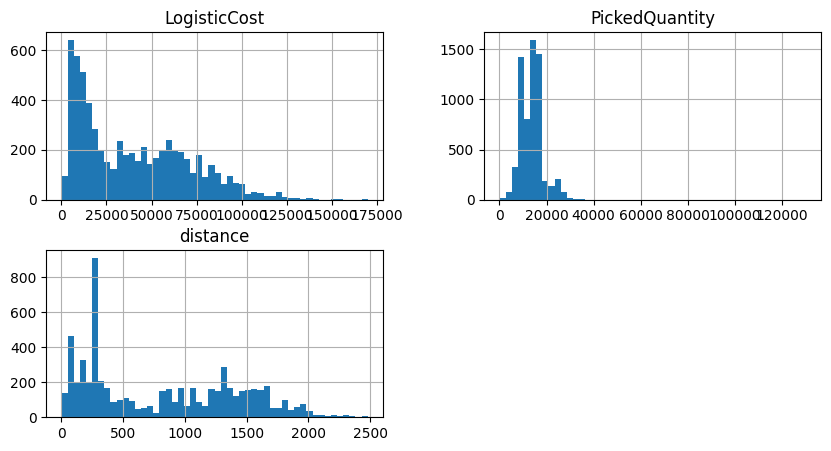

In [30]:
num_fea.hist(bins=50, figsize=(10,5));

In [31]:
df_1 = df_1[df_1['LogisticCost'] != 0]
df_1 = df_1[df_1['distance'] != 0]
df_1 = df_1[df_1['PickedQuantity'] != 0]

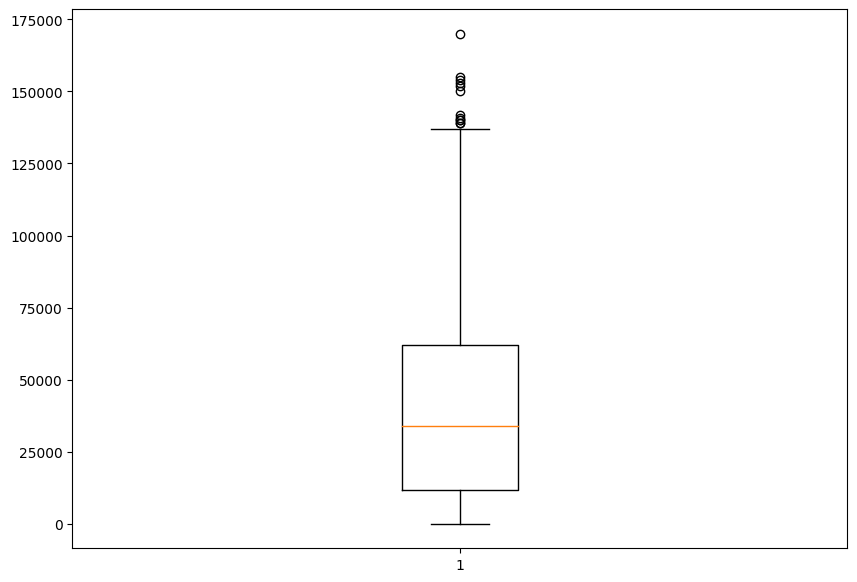

In [32]:
#Checking Outliers in LogisticCost
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['LogisticCost'])
 
# show plot
plt.show()

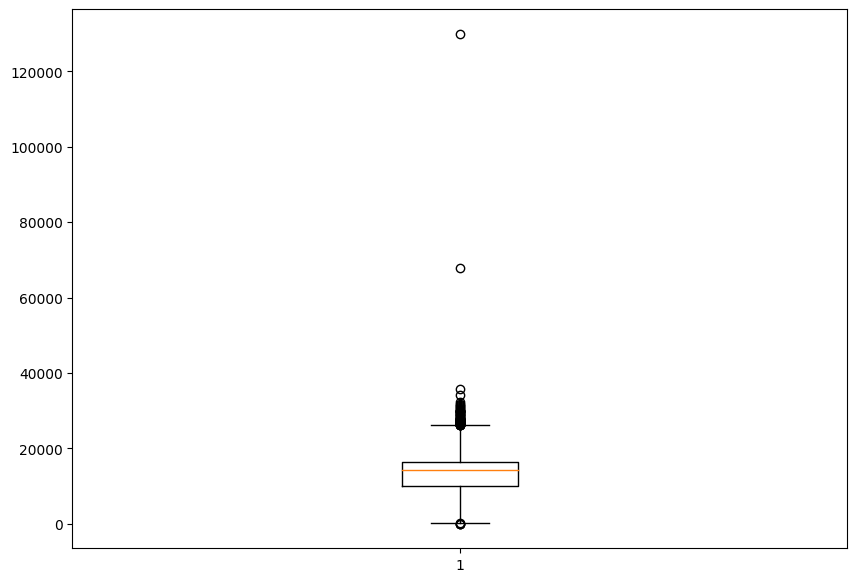

In [33]:
#Checking Outliers in PickedQuantity
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['PickedQuantity'])
 
# show plot
plt.show()

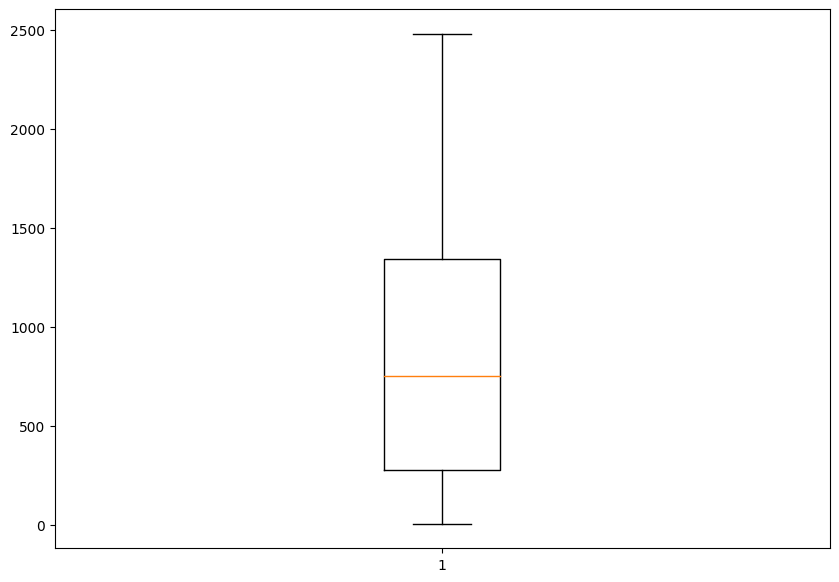

In [34]:
#Checking Outliers in PickedQuantity
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['distance'])
 
# show plot
plt.show()

In [35]:
#Removing outliers
df_1 = df_1[df_1['PickedQuantity'] < 26000]
df_1 = df_1[df_1['LogisticCost'] < 126000]

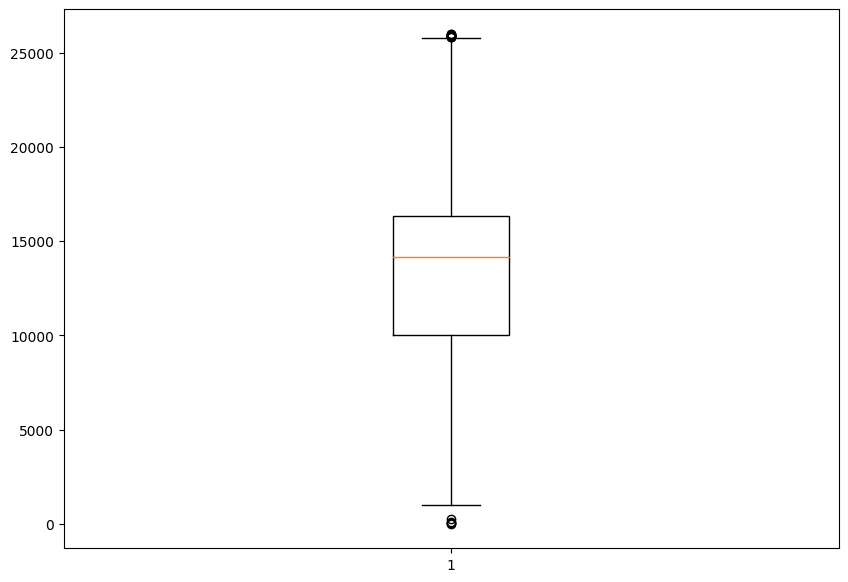

In [36]:
#Checking Outliers in PickedQuantity
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['PickedQuantity'])
 
# show plot
plt.show()

In [37]:
#Categorical features
cat_fea = [feature for feature in df_1.columns if df_1[feature].dtypes=='O']

In [38]:
cat_fea

['CategoryName',
 'SellerPickupCity',
 'SellerPickupState',
 'RecyclerShippingCity',
 'RecyclerShippingState',
 'Month',
 'route']

In [39]:
for feature in cat_fea:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_1[feature].unique())))

The feature is CategoryName and number of categories are 9
The feature is SellerPickupCity and number of categories are 245
The feature is SellerPickupState and number of categories are 25
The feature is RecyclerShippingCity and number of categories are 93
The feature is RecyclerShippingState and number of categories are 18
The feature is Month and number of categories are 12
The feature is route and number of categories are 1533


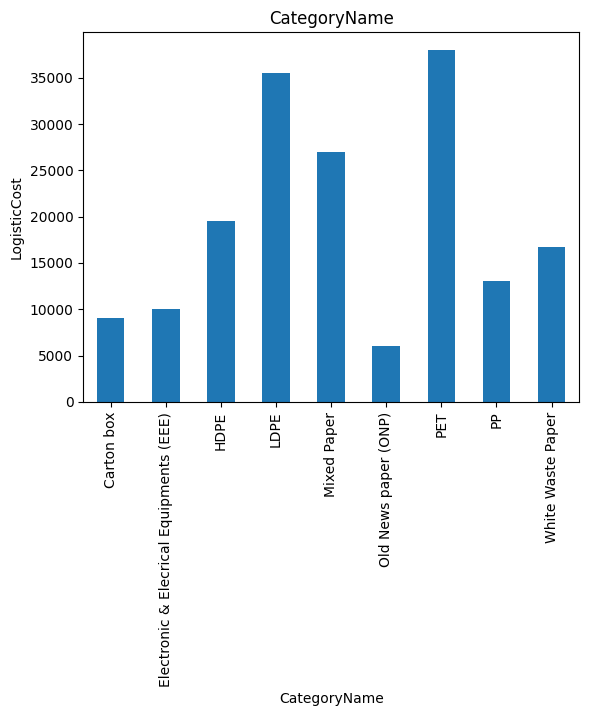

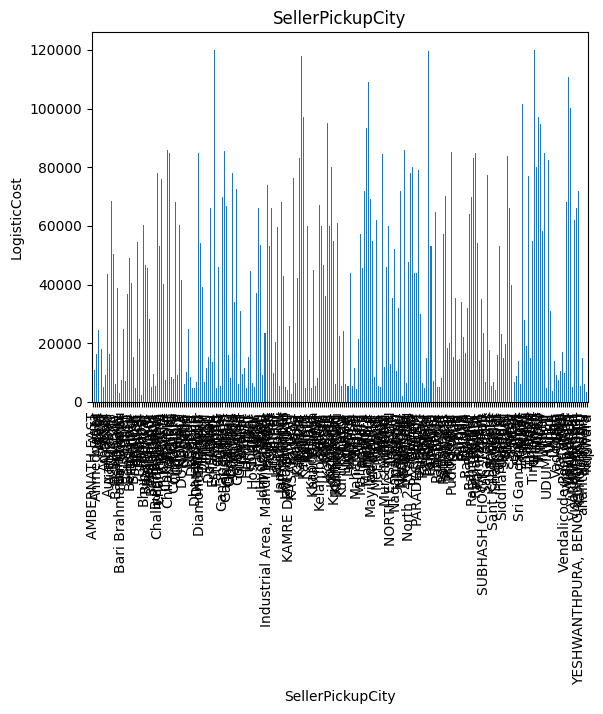

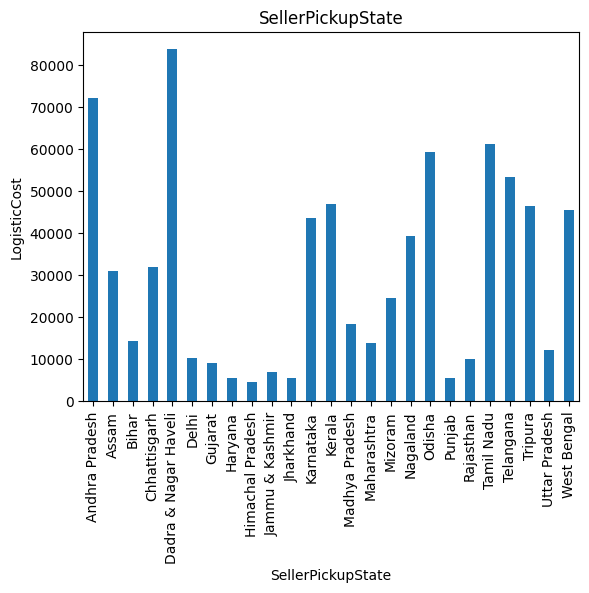

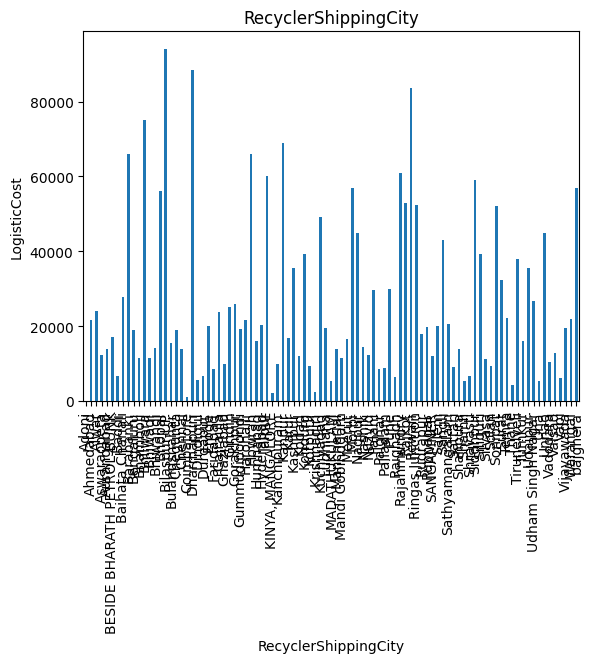

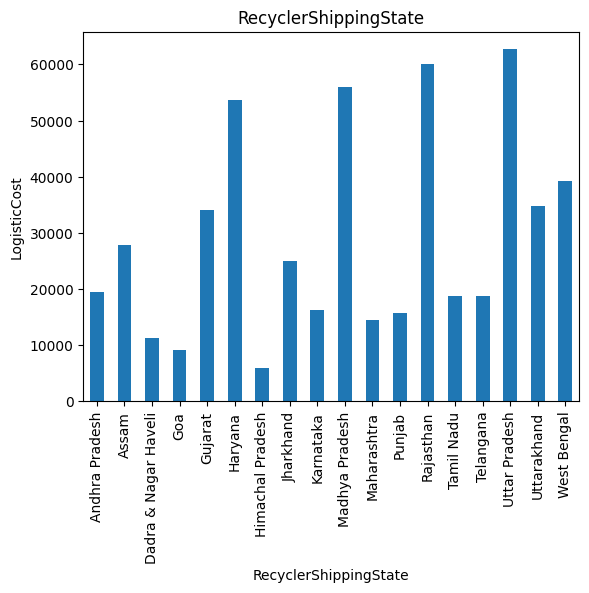

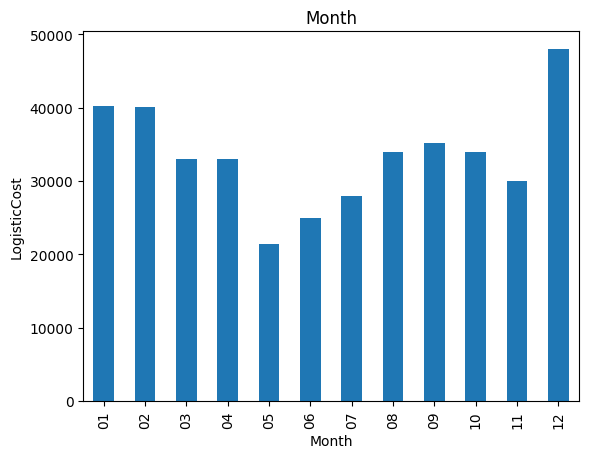

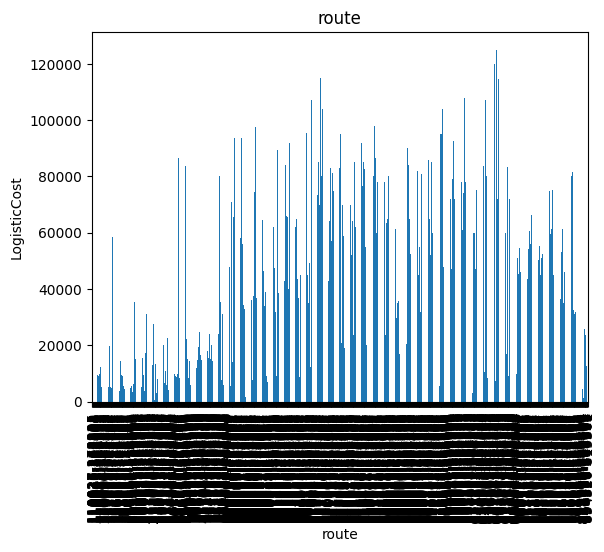

In [40]:
##Relationship between categorical variable and dependent feature - Logistic price
for feature in cat_fea:
    data=df_1.copy()
    data.groupby(feature)['LogisticCost'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('LogisticCost')
    plt.title(feature)
    plt.show()

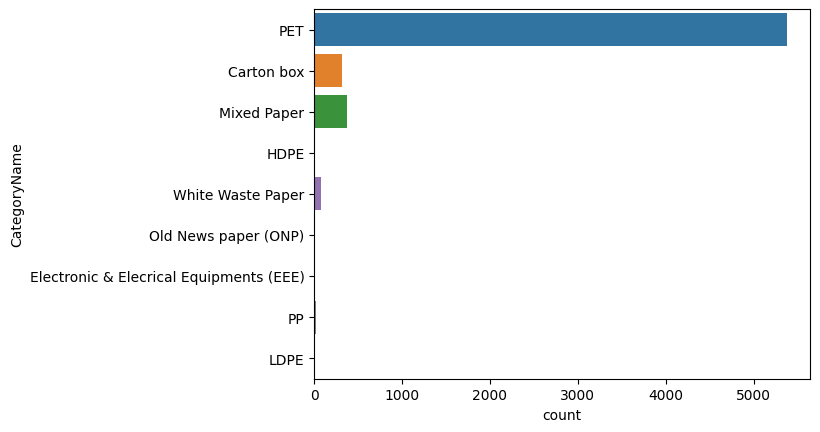

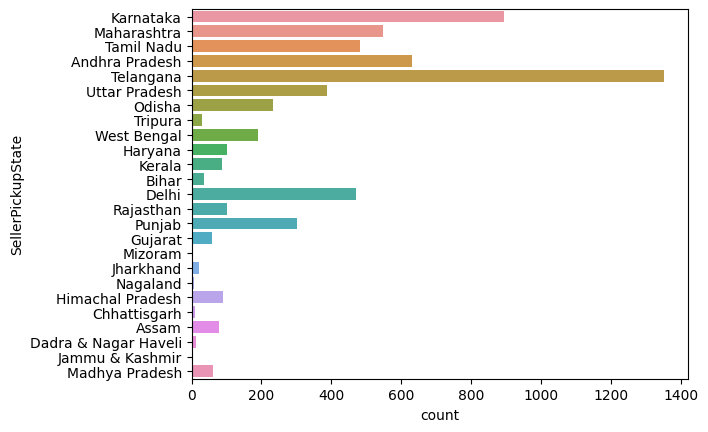

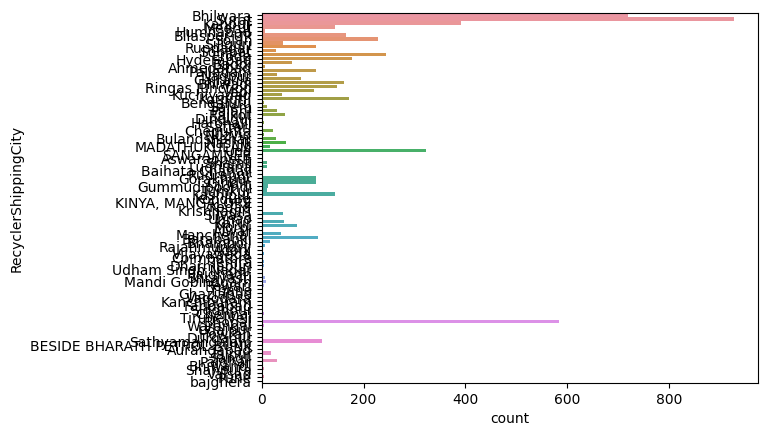

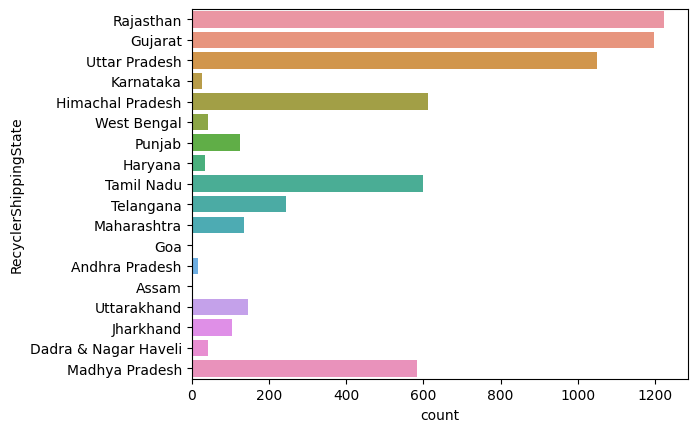

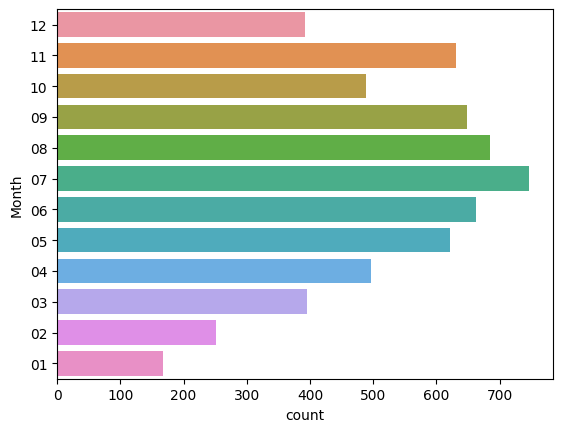

In [41]:
for col in df_1.select_dtypes(include='object'):
    if df_1[col].nunique() <= 100:
        sns.countplot(y=col, data=df_1)
        plt.show()

In [42]:
df_1.columns

Index(['CategoryName', 'PickedQuantity', 'LogisticCost', 'SellerPickupCity',
       'SellerPickupState', 'RecyclerShippingCity', 'RecyclerShippingState',
       'PickZipcode', 'DropZip', 'Month', 'LogisticCost_perkg', 'route',
       'distance'],
      dtype='object')

# Feature Engineering

In [43]:
df_1['Avg_LCostperkg'] = df_1.groupby(["SellerPickupState", "Month"])['LogisticCost_perkg'].transform('mean')


In [44]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6190 entries, 0 to 6334
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CategoryName           6190 non-null   object 
 1   PickedQuantity         6190 non-null   int64  
 2   LogisticCost           6190 non-null   float64
 3   SellerPickupCity       6190 non-null   object 
 4   SellerPickupState      6190 non-null   object 
 5   RecyclerShippingCity   6190 non-null   object 
 6   RecyclerShippingState  6190 non-null   object 
 7   PickZipcode            6190 non-null   int32  
 8   DropZip                6190 non-null   int32  
 9   Month                  6190 non-null   object 
 10  LogisticCost_perkg     6190 non-null   float64
 11  route                  6190 non-null   object 
 12  distance               6190 non-null   float64
 13  Avg_LCostperkg         6190 non-null   float64
dtypes: float64(4), int32(2), int64(1), object(7)
memory usag

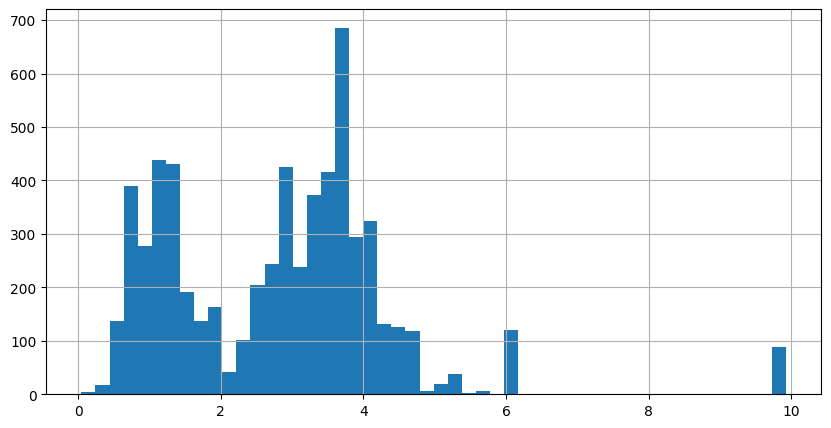

In [45]:
df_1['Avg_LCostperkg'].hist(bins=50, figsize=(10,5));

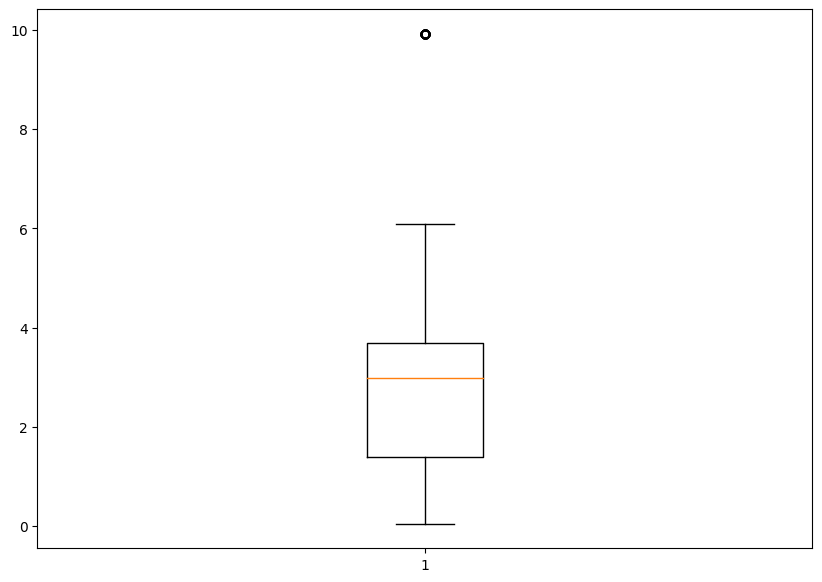

In [46]:
#Checking Outliers in Logistic Cost per kg
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_1['Avg_LCostperkg'])
 
# show plot
plt.show()

In [47]:
df_1 = df_1[df_1['Avg_LCostperkg'] < 8]

In [48]:
#Handling Categorical Variables 
#Frequency or Count based encoding
for feature in cat_fea:
    labels_ordered=df_1.groupby([feature])['LogisticCost'].median().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_1[feature]=df_1[feature].map(labels_ordered)

In [49]:
df_1.head(100)

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,Month,LogisticCost_perkg,route,distance,Avg_LCostperkg
0,8,17260,70000.0,132,16,89,16,560083,311001,11,4.055620,1139,1660.3600,3.636279
1,8,17060,70000.0,137,16,89,16,560068,311001,11,4.103165,1294,1666.1665,3.636279
2,8,9520,14280.0,91,9,67,11,401208,394125,11,1.500000,393,270.0400,1.382526
3,8,24860,105655.0,208,22,89,16,600075,311024,11,4.250000,1466,2027.2300,3.763824
4,8,17940,85000.0,225,23,88,17,533435,209304,11,4.738016,1302,1460.9481,4.697437
5,8,17990,85000.0,225,23,88,17,533435,209304,11,4.724847,1302,1460.9481,4.697437
6,8,16345,51500.0,166,20,89,16,501512,311024,11,3.150811,978,1385.7364,3.807233
7,8,9760,14640.0,80,9,67,11,400010,394125,11,1.500000,397,334.7969,1.382526
8,8,9890,14835.0,90,9,67,11,400612,394110,11,1.500000,378,292.7707,1.382526
9,8,8660,8194.0,38,8,40,17,226020,250205,11,0.946189,192,483.2200,1.991671


In [50]:
from scipy import stats

In [51]:
#Applying Transformation techniques to Target Variable
target_var_original = df_1[['LogisticCost']].copy()
# normality check
def normality(df_1,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(df_1[feature])
    plt.subplot(1,2,2)
    stats.probplot(df_1[feature],plot=plt)
    plt.show()

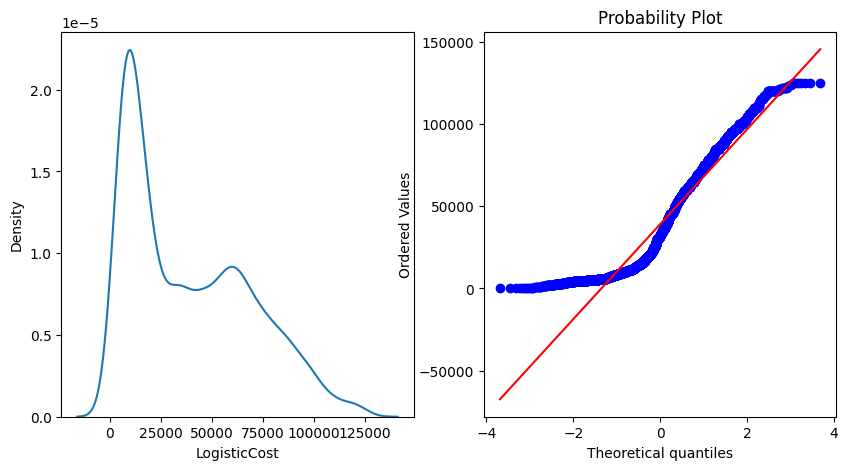

In [52]:
normality(target_var_original,'LogisticCost')

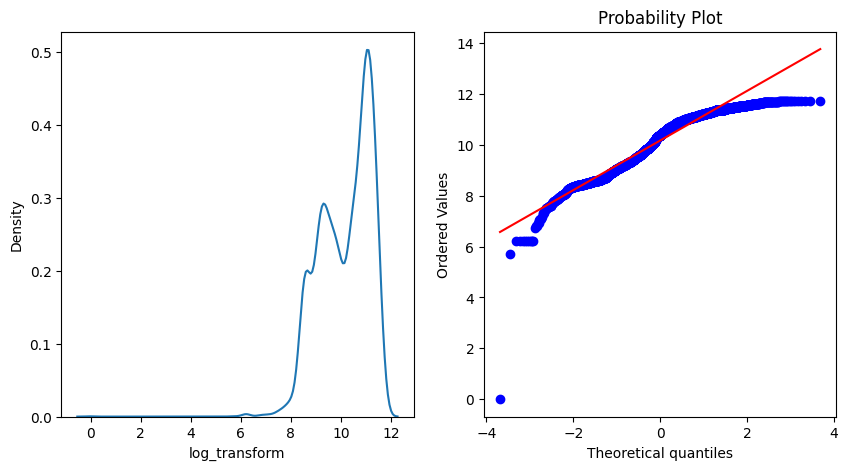

In [53]:
#Applying log transformation
target_var_original['log_transform']=np.log(target_var_original['LogisticCost'])
normality(target_var_original,'log_transform')

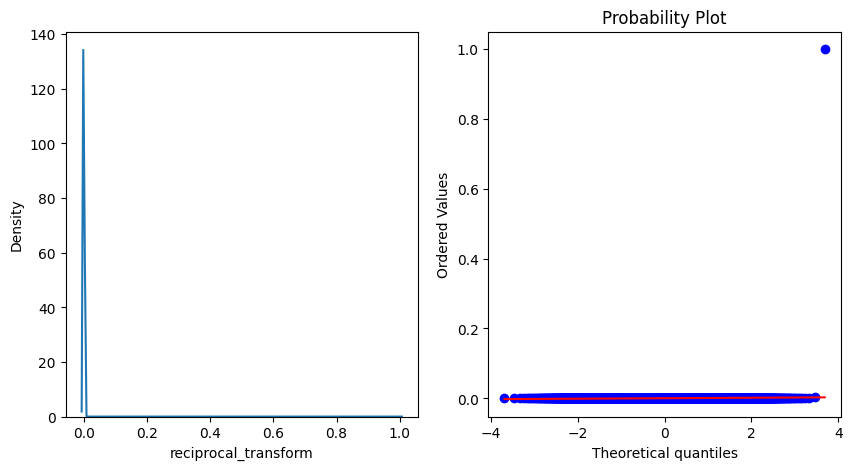

In [54]:
#applying reciprocal transformation
target_var_original['reciprocal_transform']=1/target_var_original.LogisticCost
normality(target_var_original,'reciprocal_transform')

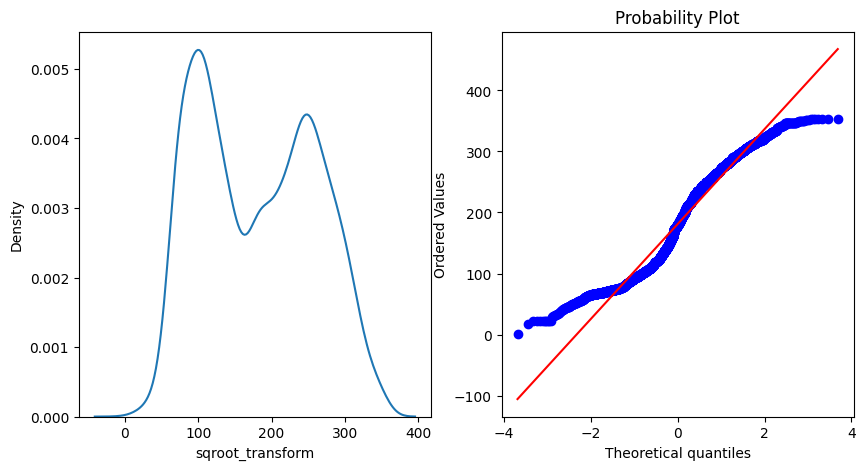

In [55]:
#applying sqroot transformation
target_var_original['sqroot_transform']= np.sqrt(target_var_original.LogisticCost)
normality(target_var_original,'sqroot_transform')
     

In [56]:
#df['LogisticCost'] = np.sqrt(df['LogisticCost'])
df_1['LogisticCost'] = np.log(df_1['LogisticCost'])


In [57]:
#Checking distribution of Picked Quantity
picked_quantity = df_1[['PickedQuantity']].copy()

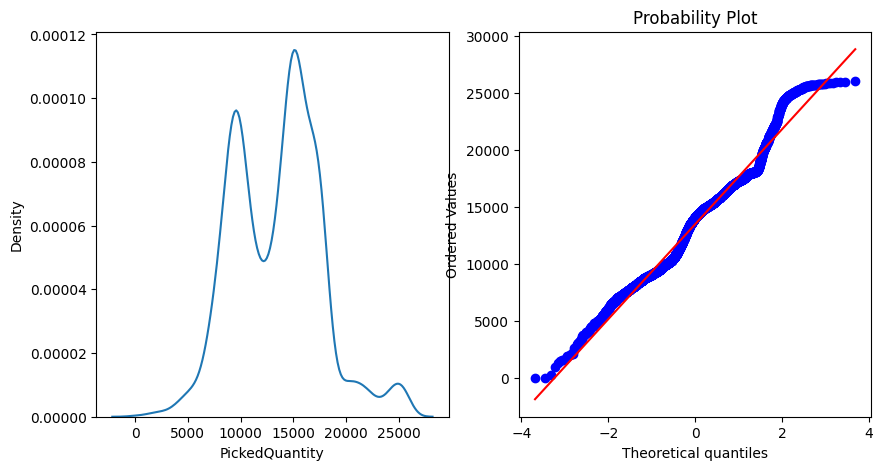

In [58]:
normality(picked_quantity,'PickedQuantity')

In [59]:
#Data agumentation using SDV library 
#from sdv.tabular import CTGAN
#gan_model = CTGAN(epochs = 150)

In [60]:
#gan_model.fit(df_1)

In [61]:
#Synthesised 1k samples
#sampled_data  = gan_model.sample(1000)

In [62]:
df_1.describe()

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,Month,LogisticCost_perkg,route,distance,Avg_LCostperkg
count,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000
mean,7.433792,13492.764503,10.168019,130.885284,14.879712,58.711078,11.339889,458795.680269,361582.662897,4.638807,2.713083,668.801540,812.760835,2.713083
std,1.708889,4200.432482,1.007822,57.300174,6.957191,27.548231,5.521680,188178.650363,150161.263179,3.282521,4.257351,417.116842,603.241769,1.328451
min,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110018.000000,121004.000000,0.000000,0.019608,0.000000,4.742300,0.045467
25%,8.000000,9972.500000,9.334238,80.000000,8.000000,40.000000,7.000000,396230.000000,244921.000000,2.000000,1.058824,300.000000,273.094700,1.382526
50%,8.000000,14070.000000,10.373491,137.000000,16.000000,67.000000,12.000000,500077.000000,332404.000000,4.000000,2.250039,641.000000,780.554050,2.973838
75%,8.000000,16225.000000,11.034890,166.000000,20.000000,81.000000,16.000000,560068.000000,462046.000000,7.000000,3.955734,1030.000000,1334.782925,3.670885
max,8.000000,25995.000000,11.736069,244.000000,24.000000,92.000000,17.000000,854326.000000,815301.000000,11.000000,283.333333,1513.000000,2481.477800,6.078402


In [63]:
#sampled_data.describe()

In [64]:
#checking shape of the data sample
#sampled_data.shape

In [65]:
#Dropping Duplicates
#sampled_data.drop_duplicates()

In [66]:
#checking shape after dropping duplicates
#sampled_data.shape

In [67]:
#Final dataframe is created by concatinating original and sampled data
#final_df = pd.concat([df_1, sampled_data])
final_df = df_1

In [68]:
final_df.shape

(6102, 14)

In [69]:
final_df = final_df.drop_duplicates()

In [70]:
final_df.shape

(5505, 14)

# Exploratory Data Analysis - part 2

In [71]:
#Numerical Features
num_fea_1 = final_df[['LogisticCost','PickedQuantity','Avg_LCostperkg']]

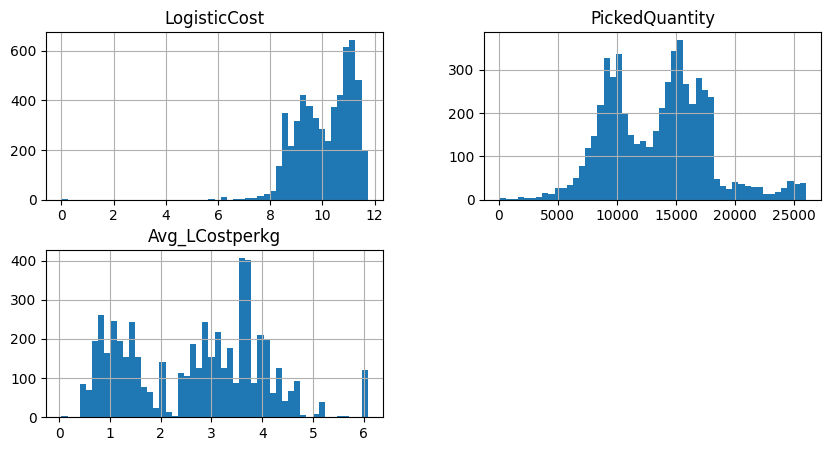

In [72]:
num_fea_1.hist(bins=50, figsize=(10,5));

In [73]:
#Removing data points which as zero values
final_df = final_df[final_df['PickedQuantity'] != 0 ]
final_df = final_df[final_df['LogisticCost'] > 0 ]


In [74]:
final_df.head(100)

,CategoryName,PickedQuantity,LogisticCost,SellerPickupCity,SellerPickupState,RecyclerShippingCity,RecyclerShippingState,PickZipcode,DropZip,Month,LogisticCost_perkg,route,distance,Avg_LCostperkg
0,8,17260,11.156251,132,16,89,16,560083,311001,11,4.055620,1139,1660.3600,3.636279
1,8,17060,11.156251,137,16,89,16,560068,311001,11,4.103165,1294,1666.1665,3.636279
2,8,9520,9.566615,91,9,67,11,401208,394125,11,1.500000,393,270.0400,1.382526
3,8,24860,11.567934,208,22,89,16,600075,311024,11,4.250000,1466,2027.2300,3.763824
4,8,17940,11.350407,225,23,88,17,533435,209304,11,4.738016,1302,1460.9481,4.697437
5,8,17990,11.350407,225,23,88,17,533435,209304,11,4.724847,1302,1460.9481,4.697437
6,8,16345,10.849337,166,20,89,16,501512,311024,11,3.150811,978,1385.7364,3.807233
7,8,9760,9.591513,80,9,67,11,400010,394125,11,1.500000,397,334.7969,1.382526
8,8,9890,9.604745,90,9,67,11,400612,394110,11,1.500000,378,292.7707,1.382526
9,8,8660,9.011157,38,8,40,17,226020,250205,11,0.946189,192,483.2200,1.991671


In [75]:
final_df = final_df.drop(['PickZipcode','DropZip','route'],axis = 1)

<AxesSubplot: >

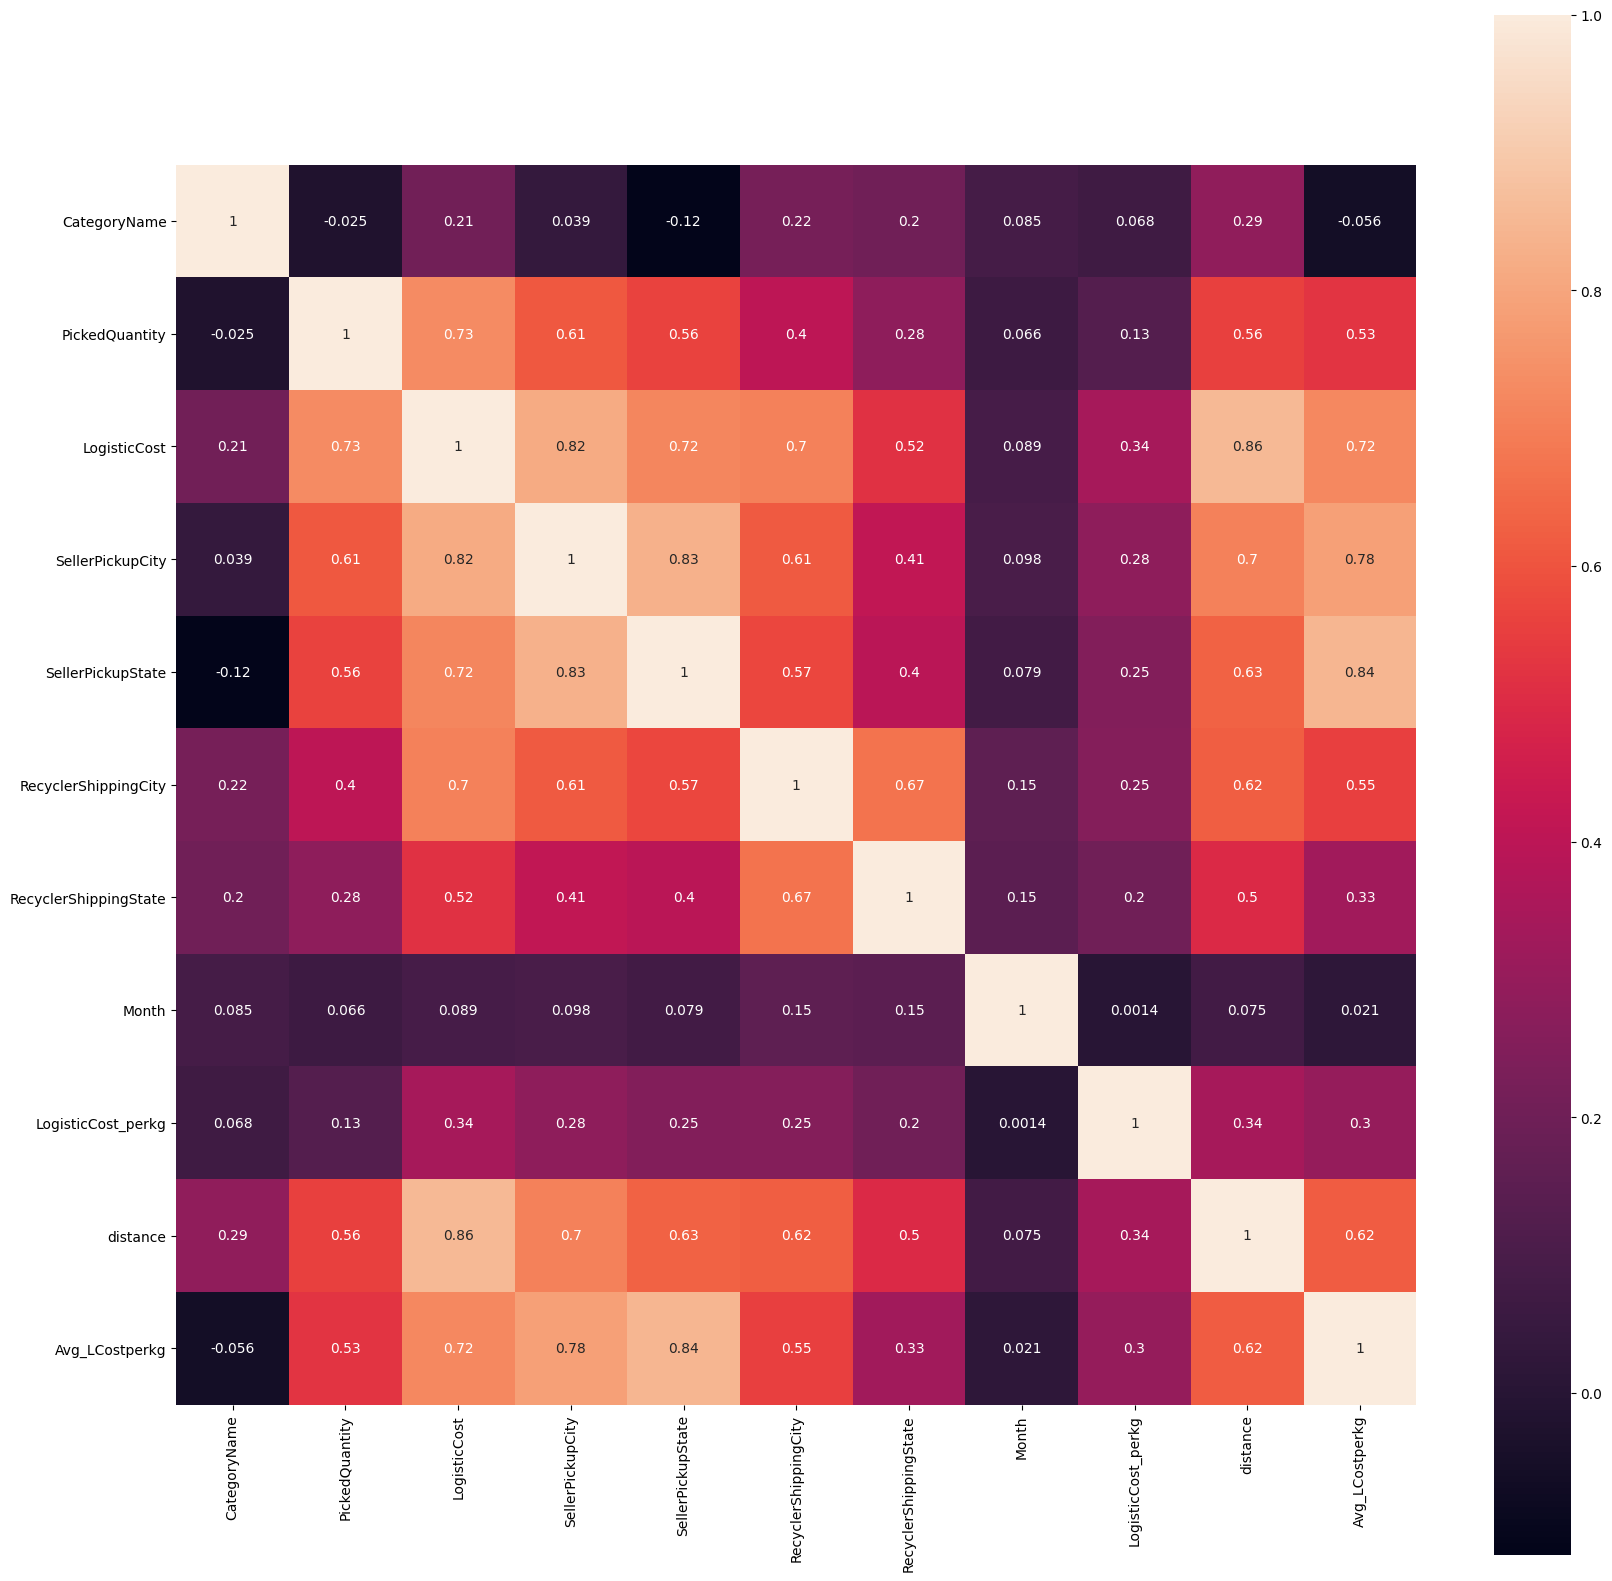

In [76]:
#checking correlation between the variables
corr_plot = final_df.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_plot, annot=True, square=True)

In [77]:
final_df = final_df.drop(['Month','LogisticCost_perkg'],axis = 1)

In [78]:
final_df.shape

(5504, 9)

# Data Pre-Processing

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


In [80]:
#preprocessing data
X_data = final_df.drop(columns=['LogisticCost']).copy()
y_data = final_df[['LogisticCost']].copy()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)

# Training Model

In [82]:
models = [
           ['LinearRegression',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['catBoostRegressor:',CatBoostRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()]
         ]

In [83]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    curr_model_data["Test_MAE_Score"] = mean_absolute_error(y_test,curr_model.predict(X_test))
    
    model_data.append(curr_model_data)

Learning rate set to 0.051748
0:	learn: 0.9679484	total: 133ms	remaining: 2m 13s
1:	learn: 0.9268645	total: 138ms	remaining: 1m 8s
2:	learn: 0.8874050	total: 142ms	remaining: 47.3s
3:	learn: 0.8505069	total: 146ms	remaining: 36.4s
4:	learn: 0.8163276	total: 150ms	remaining: 29.9s
5:	learn: 0.7831653	total: 154ms	remaining: 25.5s
6:	learn: 0.7523980	total: 158ms	remaining: 22.4s
7:	learn: 0.7229197	total: 162ms	remaining: 20.1s
8:	learn: 0.6957538	total: 166ms	remaining: 18.2s
9:	learn: 0.6699364	total: 169ms	remaining: 16.8s
10:	learn: 0.6451206	total: 173ms	remaining: 15.6s
11:	learn: 0.6226079	total: 177ms	remaining: 14.6s
12:	learn: 0.6010096	total: 180ms	remaining: 13.7s
13:	learn: 0.5808716	total: 183ms	remaining: 12.9s
14:	learn: 0.5615475	total: 186ms	remaining: 12.2s
15:	learn: 0.5439140	total: 189ms	remaining: 11.6s
16:	learn: 0.5261726	total: 192ms	remaining: 11.1s
17:	learn: 0.5100441	total: 194ms	remaining: 10.6s
18:	learn: 0.4949131	total: 197ms	remaining: 10.2s
19:	learn:

In [84]:
model_data

[{'Name': 'LinearRegression',
  'Train_Time': 0.012693643569946289,
  'Train_R2_Score': 0.8921808911925604,
  'Test_R2_Score': 0.8922911902767674,
  'Test_RMSE_Score': 0.3309032155057642,
  'Test_MAE_Score': 0.24010664991720562},
 {'Name': 'Lasso: ',
  'Train_Time': 0.007996559143066406,
  'Train_R2_Score': 0.882735863392465,
  'Test_R2_Score': 0.8841827528901033,
  'Test_RMSE_Score': 0.3431326094674621,
  'Test_MAE_Score': 0.25180505721779045},
 {'Name': 'Ridge: ',
  'Train_Time': 0.0,
  'Train_R2_Score': 0.8921808898614847,
  'Test_R2_Score': 0.8922932935266479,
  'Test_RMSE_Score': 0.3308999846857975,
  'Test_MAE_Score': 0.2401007871170381},
 {'Name': 'ElasticNet: ',
  'Train_Time': 0.0,
  'Train_R2_Score': 0.8843313006282448,
  'Test_R2_Score': 0.8866426108566615,
  'Test_RMSE_Score': 0.33946913316212546,
  'Test_MAE_Score': 0.24813997836431592},
 {'Name': 'DecisionTreeRegresson: ',
  'Train_Time': 0.016026735305786133,
  'Train_R2_Score': 0.9999944797761425,
  'Test_R2_Score': 0.9

In [85]:
result_df = pd.DataFrame(model_data)
print(result_df)

                            Name  Train_Time  Train_R2_Score  Test_R2_Score  \
0               LinearRegression    0.012694        0.892181       0.892291   
1                        Lasso:     0.007997        0.882736       0.884183   
2                        Ridge:     0.000000        0.892181       0.892293   
3                   ElasticNet:     0.000000        0.884331       0.886643   
4        DecisionTreeRegresson:     0.016027        0.999994       0.935448   
5          KNeighborsRegressor:     0.007939        0.917245       0.862882   
6                           SVR:    0.523587        0.858557       0.849033   
7                  RandomForest     0.976959        0.993570       0.957061   
8           ExtraTreeRegressor :    0.698921        0.999994       0.964899   
9   GradientBoostingClassifier:     0.306105        0.956553       0.940611   
10                XGBRegressor:     0.179983        0.994076       0.953069   
11            catBoostRegressor:    1.736715        

In [86]:
print(X_train)

      CategoryName  PickedQuantity  SellerPickupCity  SellerPickupState  \
6163             8           16120               137                 16   
5205             8           16650               198                 23   
5854             8            9590               166                 20   
2907             8           18030               137                 16   
1441             1           10910               108                 17   
...            ...             ...               ...                ...   
5744             8           16370               214                 16   
3458             8           10300                74                  8   
1762             8           13855                73                  7   
2778             8           14870               166                 20   
2905             8           12380                95                  9   

      RecyclerShippingCity  RecyclerShippingState   distance  Avg_LCostperkg  
6163                

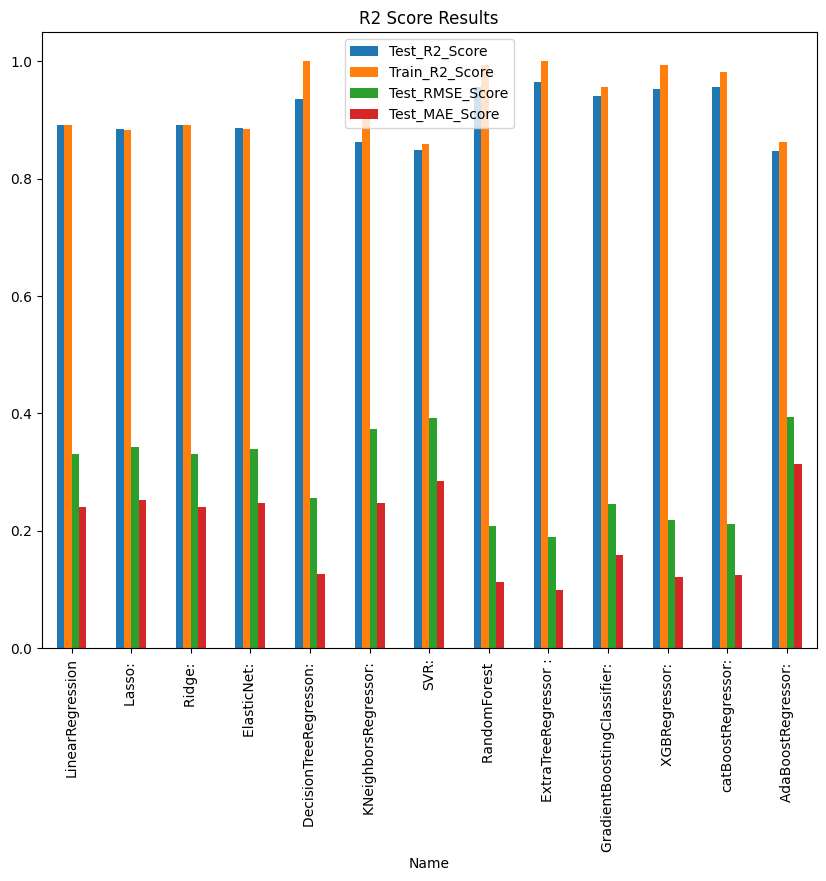

In [87]:
#visualizing result
result_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score','Test_RMSE_Score','Test_MAE_Score' ], 
               kind="bar" , 
               title = 'R2 Score Results' , 
               figsize= (10,8)) ;

# Model Selection

In [88]:
from catboost import CatBoostRegressor
catboost_noSyn_data = CatBoostRegressor() 
catboost_noSyn_data.fit(X_train, y_train)

Learning rate set to 0.051748
0:	learn: 0.9679484	total: 2.71ms	remaining: 2.7s
1:	learn: 0.9268645	total: 4.66ms	remaining: 2.33s
2:	learn: 0.8874050	total: 6.51ms	remaining: 2.16s
3:	learn: 0.8505069	total: 8.96ms	remaining: 2.23s
4:	learn: 0.8163276	total: 11.9ms	remaining: 2.37s
5:	learn: 0.7831653	total: 14.4ms	remaining: 2.38s
6:	learn: 0.7523980	total: 16.7ms	remaining: 2.37s
7:	learn: 0.7229197	total: 18.9ms	remaining: 2.34s
8:	learn: 0.6957538	total: 20.5ms	remaining: 2.25s
9:	learn: 0.6699364	total: 22.2ms	remaining: 2.2s
10:	learn: 0.6451206	total: 23.6ms	remaining: 2.12s
11:	learn: 0.6226079	total: 25.1ms	remaining: 2.06s
12:	learn: 0.6010096	total: 26.4ms	remaining: 2s
13:	learn: 0.5808716	total: 27.8ms	remaining: 1.96s
14:	learn: 0.5615475	total: 29.2ms	remaining: 1.92s
15:	learn: 0.5439140	total: 30.5ms	remaining: 1.88s
16:	learn: 0.5261726	total: 31.9ms	remaining: 1.84s
17:	learn: 0.5100441	total: 33.3ms	remaining: 1.81s
18:	learn: 0.4949131	total: 34.7ms	remaining: 1.7

In [89]:
print(sqrt(mean_squared_error(y_test,catboost_noSyn_data.predict(X_test))))

0.21160028113899876


# Hyper Parameter Tuning

In [90]:
#from sklearn.model_selection import GridSearchCV

In [91]:
#parameters = {'depth'         : [6,8,10],
                  #'learning_rate' : [0.01, 0.05, 0.1],
                  #'iterations'    : [30, 50, 100]
                 #}


In [92]:
#grid = GridSearchCV(estimator=catboost, param_grid = parameters, cv = 2, n_jobs=-1)
#grid.fit(X_train, y_train)

In [93]:
#print(grid.best_estimator_)

In [94]:
#print(grid.best_params_)

In [95]:
#print(grid.best_score_)

In [96]:
#catboost_1 = CatBoostRegressor(depth = 10, iterations=30, learning_rate = 0.01,loss_function='RMSE') 
#catboost_1.fit(X_train, y_train)

In [97]:
#print(sqrt(mean_squared_error(y_test,catboost_1.predict(X_test))))

# Model Explainability

In [98]:
import shap

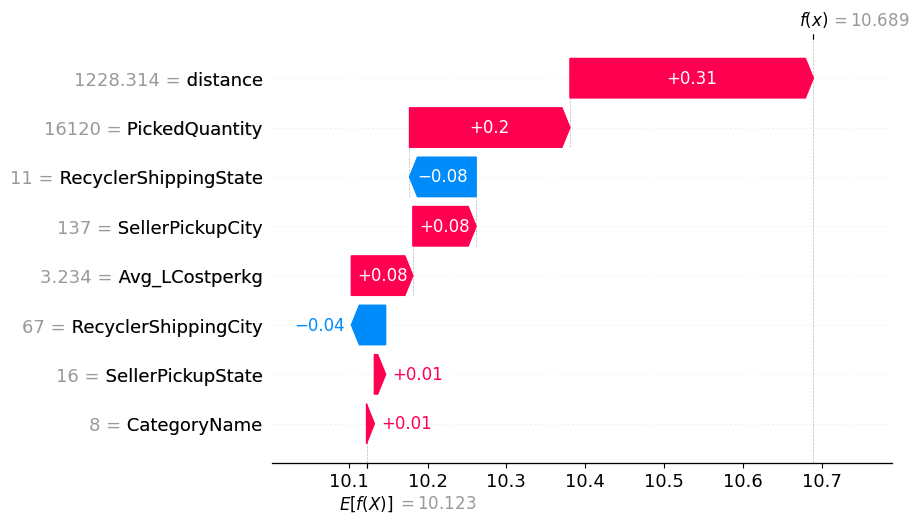

In [99]:
# get shap values
explainer = shap.Explainer(catboost_noSyn_data)
shap_values = explainer(X_train)

# waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

# Saving Model

In [100]:
import pickle

In [101]:
pickle.dump(catboost_noSyn_data, open('Cat_logistic_cost_noDataSyn_withAvgLC_1.pkl', 'wb'))

In [102]:
pickled_model = pickle.load(open('Cat_logistic_cost_noDataSyn_withAvgLC_1.pkl', 'rb'))
logistic_cost = pickled_model.predict(X_test)

In [103]:
cat_prediction_noDataSyn = np.expm1(logistic_cost)

In [104]:
y_gt_test = np.expm1(y_test)

In [105]:
y_test_df = pd.DataFrame(y_gt_test).reset_index(drop=True)

In [106]:
y_test_df

,LogisticCost
0,30499.0
1,6999.0
2,65999.0
3,20699.0
4,74899.0
...,...
1096,15174.0
1097,7999.0
1098,121999.0
1099,104239.0


In [107]:
prediction = pd.DataFrame(cat_prediction_noDataSyn)

In [108]:
prediction.columns = ['cat_prediction_noDataSyn_withavgLC_1']

In [109]:
prediction

,cat_prediction_noDataSyn_withavgLC_1
0,31726.630261
1,3602.625596
2,70265.509241
3,16608.541981
4,73546.229193
...,...
1096,16153.687210
1097,8431.489095
1098,109789.034207
1099,97363.977468


In [110]:
pd.concat([y_test_df,prediction],ignore_index=True)

,LogisticCost,cat_prediction_noDataSyn_withavgLC_1
0,30499.0,NaN
1,6999.0,NaN
2,65999.0,NaN
3,20699.0,NaN
4,74899.0,NaN
...,...,...
2197,NaN,16153.687210
2198,NaN,8431.489095
2199,NaN,109789.034207
2200,NaN,97363.977468


In [111]:
data  = list(zip(y_test_df['LogisticCost'],prediction['cat_prediction_noDataSyn_withavgLC_1']))

In [112]:
result_df = pd.DataFrame(data, columns =['LogisticCost', 'cat_prediction_noDataSyn_withavgLC_1'])

In [113]:
result_df.head(50)

,LogisticCost,cat_prediction_noDataSyn_withavgLC_1
0,30499.0,31726.630261
1,6999.0,3602.625596
2,65999.0,70265.509241
3,20699.0,16608.541981
4,74899.0,73546.229193
5,31999.0,33792.057633
6,67999.0,68763.107852
7,95699.0,102250.629628
8,19999.0,18181.482831
9,22999.0,17984.024540


In [114]:
result_df['diff'] = abs(result_df['LogisticCost']-result_df['cat_prediction_noDataSyn_withavgLC_1'])

In [115]:
result_df['Percentage_Error'] = ((result_df['diff'] / result_df['LogisticCost']) * 100)

In [116]:
result_df.to_csv('Cat_LogisticCost_Prediction_noMildSteel_noDataSyn_withAvgLC_1')

# Checking Train Data


In [117]:
pickled_model_Xdata = pickle.load(open('Cat_logistic_cost_noDataSyn_withAvgLC_1.pkl', 'rb'))
logistic_cost_Xdata = pickled_model.predict(X_data)

In [118]:
cat_prediction_noDataSyn_Xdata = np.expm1(logistic_cost_Xdata)

In [119]:
y_gt_test = np.expm1(y_data)

In [120]:
y_data_df = pd.DataFrame(y_gt_test).reset_index(drop=True)

In [121]:
prediction_Xdata = pd.DataFrame(cat_prediction_noDataSyn_Xdata)

In [122]:
prediction_Xdata.columns = ['cat_prediction_noDataSyn_withavgLC_Xdata']

In [123]:
pd.concat([y_data_df,prediction_Xdata],ignore_index=True)

,LogisticCost,cat_prediction_noDataSyn_withavgLC_Xdata
0,69999.0,NaN
1,69999.0,NaN
2,14279.0,NaN
3,105654.0,NaN
4,84999.0,NaN
...,...,...
11003,NaN,43981.522084
11004,NaN,15722.956531
11005,NaN,34823.097940
11006,NaN,33418.664326


In [124]:
data_X  = list(zip(y_data_df['LogisticCost'],prediction_Xdata['cat_prediction_noDataSyn_withavgLC_Xdata']))

In [125]:
result_df_Xdata = pd.DataFrame(data_X, columns =['LogisticCost', 'cat_prediction_noDataSyn_withavgLC_Xdata'])

In [126]:
result_df_Xdata['diff'] = abs(result_df_Xdata['LogisticCost']-result_df_Xdata['cat_prediction_noDataSyn_withavgLC_Xdata'])

In [127]:
result_df_Xdata['Percentage_Error'] = ((result_df_Xdata['diff'] / result_df_Xdata['LogisticCost']) * 100)

In [128]:
result_df_Xdata.to_csv('Cat_LogisticCost_Prediction_noMildSteel_noDataSyn_withAvgLC_Xdata')

In [129]:
xg_boost_noSyn_data = xgb.XGBRegressor() 
xg_boost_noSyn_data.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [130]:
pickle.dump(xg_boost_noSyn_data, open('Xgb_logistic_cost_noDataSyn_withAvgLC_1.pkl', 'wb'))

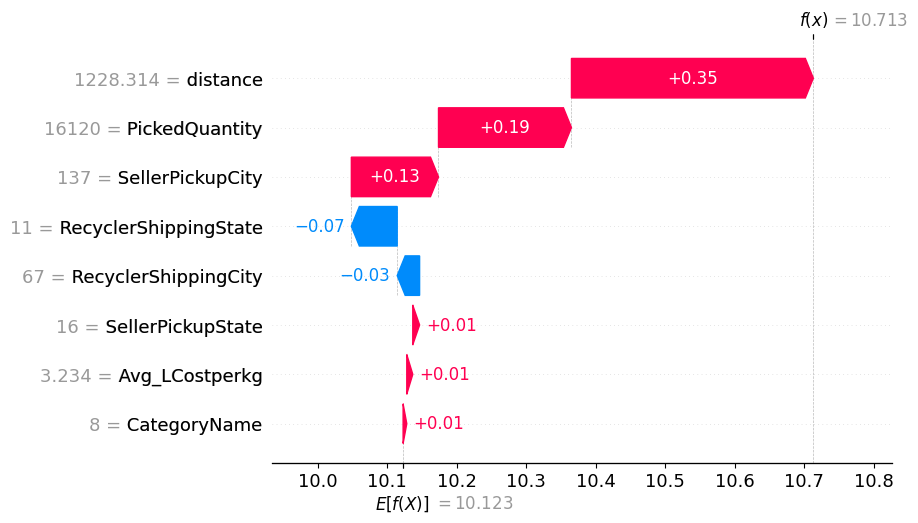

In [131]:
# get shap values
explainer = shap.Explainer(xg_boost_noSyn_data)
shap_values = explainer(X_train)

# waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [132]:
pickled_model = pickle.load(open('Xgb_logistic_cost_noDataSyn_withAvgLC_1.pkl', 'rb'))
logistic_cost = pickled_model.predict(X_test)

In [133]:
xgb_prediction_noDataSyn = np.expm1(logistic_cost)

In [134]:
y_gt_test = np.expm1(y_data)

In [135]:
y_data_df = pd.DataFrame(y_gt_test).reset_index(drop=True)

In [136]:
prediction_Xdata = pd.DataFrame(cat_prediction_noDataSyn_Xdata)

In [137]:
prediction_Xdata.columns = ['xgb_prediction_noDataSyn_withavgLC_Xdata']

In [138]:
pd.concat([y_data_df,prediction_Xdata],ignore_index=True)

,LogisticCost,xgb_prediction_noDataSyn_withavgLC_Xdata
0,69999.0,NaN
1,69999.0,NaN
2,14279.0,NaN
3,105654.0,NaN
4,84999.0,NaN
...,...,...
11003,NaN,43981.522084
11004,NaN,15722.956531
11005,NaN,34823.097940
11006,NaN,33418.664326


In [139]:
data_X  = list(zip(y_data_df['LogisticCost'],prediction_Xdata['xgb_prediction_noDataSyn_withavgLC_Xdata']))

In [140]:
result_df_Xdata = pd.DataFrame(data_X, columns =['LogisticCost', 'xgb_prediction_noDataSyn_withavgLC_Xdata'])

In [141]:
result_df_Xdata['diff'] = abs(result_df_Xdata['LogisticCost']-result_df_Xdata['xgb_prediction_noDataSyn_withavgLC_Xdata'])

In [142]:
result_df_Xdata['Percentage_Error'] = ((result_df_Xdata['diff'] / result_df_Xdata['LogisticCost']) * 100)

In [143]:
result_df_Xdata.to_csv('Xgb_LogisticCost_Prediction_noMildSteel_noDataSyn_withAvgLC_Xdata')